In [5]:
import  numpy as np
from sklearn.datasets import make_blobs

np.random.seed(42)

# Create an imbalanced dataset with two features
X, y = make_blobs(
    n_samples=[4500,500],
    n_features=2,  # Use only two features
    cluster_std=[4.0,4.0],
    random_state=42
)
print(y)
print(X)

print(len(y))
print(len(y[y==1]))
print(len(y[y==0]))

[0 0 0 ... 0 1 0]
[[-1.16896551 10.27890996]
 [ 4.08872595 13.29672837]
 [-6.07537158  9.29310321]
 ...
 [-0.78014582 10.89446288]
 [ 4.58586586 -2.45376227]
 [ 3.08918096  3.64577513]]
5000
500
4500


In [2]:
# Restart the runtime before running the examples below.
!pip install latexify-py==0.4.2


  Using cached latexify_py-0.4.2-py3-none-any.whl.metadata (3.9 kB)
Using cached latexify_py-0.4.2-py3-none-any.whl (38 kB)
  Attempting uninstall: latexify-py
    Found existing installation: latexify-py 0.3.1
    Uninstalling latexify-py-0.3.1:
      Successfully uninstalled latexify-py-0.3.1


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
# from latexify import latexify, format_axes

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.2)
def visualize_tree(depth, X, y, ax=None, cmap='rainbow'):
    model = DecisionTreeClassifier(max_depth=depth)
    ax = ax or plt.gca()
    print(model, depth)
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # format_axes(plt.gca())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, 
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.tight_layout()
    plt.savefig(f"../ML_coding/-{depth}.pdf", bbox_inches="tight")
    plt.clf()
    plt.show()


In [21]:
for depth in range(1,11):
        visualize_tree(depth, X, y)

DecisionTreeClassifier(max_depth=1) 1


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=2) 2


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=3) 3


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=4) 4


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=5) 5


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=6) 6


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=7) 7


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=8) 8


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=9) 9


<Figure size 640x480 with 0 Axes>

DecisionTreeClassifier(max_depth=10) 10


<Figure size 640x480 with 0 Axes>

decision TREE implementation

In [27]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 391.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import graphviz


class TreeNode:
    def __init__(self, name, value=None, shape='rectangle'):
        self.name = name
        self.value = value
        self.children = []
        self.shape = shape

    def add_child(self, child_node):
        self.children.append(child_node)

    def display_tree_text(self, level=0):
        indent = "  " * level
        print(f"{indent}|- {self.name}: {self.value}")
        for child in self.children:
            child.display_tree_text(level + 1)

    def display_tree_graphviz(self, dot=None, parent_name=None, graph=None):
        if graph is None:
            graph = graphviz.Digraph(format='png')
        graph.node(str(id(self)), str(self.name), shape=self.shape)

        if parent_name is not None:
            graph.edge(str(id(parent_name)), str(id(self)))

        for child in self.children:
            child.display_tree_graphviz(dot, self, graph)

        return graph

    def display_tree_directly(self):
        graph = self.display_tree_graphviz()
        src = graph.source
        display(graphviz.Source(src, format='png'))

In [4]:
# Creating nodes
root = TreeNode("Root")
child1 = TreeNode("Child 1")
child2 = TreeNode("Child 2")
child3 = TreeNode("Child 3")

# Building the tree structure
root.add_child(child1)
root.add_child(child2)
child2.add_child(child3)

In [3]:
# Displaying the tree in text format
root.display_tree_text()

|- Root: None
  |- Child 1: None
  |- Child 2: None
    |- Child 3: None


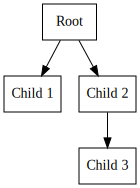

In [5]:
graph = root.display_tree_graphviz()
graph

In [6]:
class DecisionTreeNode:
    def __init__(self, feature, threshold, decision=None, left=None, right=None, shape='box'):
        self.feature = feature
        self.threshold = threshold
        self.decision = decision
        self.left = left
        self.right = right
        self.shape = shape

    def display_tree_graphviz(self, dot=None, parent_name=None, graph=None, edge_label=None):
        if graph is None:
            graph = graphviz.Digraph(format='png')

        node_label = self.feature
        
        if self.threshold is not None:
            node_label += f" <= {self.threshold}"
        
        if self.decision is not None:
            node_label += f"\nDecision: {self.decision}"
        
        graph.node(str(id(self)), node_label, shape=self.shape)

        if parent_name is not None:
            if edge_label is not None:
                graph.edge(str(id(parent_name)), str(id(self)), label=edge_label)
            else:
                graph.edge(str(id(parent_name)), str(id(self)))

        if self.left is not None:
            self.left.display_tree_graphviz(dot, self, graph, edge_label="True")
        if self.right is not None:
            self.right.display_tree_graphviz(dot, self, graph, edge_label="False")

        return graph

In [7]:
root = DecisionTreeNode("Feature A", 5.0, decision=None)
left_child = DecisionTreeNode("Feature B", 3.0, decision=None)
right_child = DecisionTreeNode("Feature C", 8.0, decision=None)
root.left = left_child
root.right = right_child

left_left = DecisionTreeNode("", None, decision = 20.0)
left_right = DecisionTreeNode("", None, decision = 10.0)

left_child.left = left_left
left_child.right = left_right

right_left = DecisionTreeNode("", None, decision = 30.0)
right_right = DecisionTreeNode("", None, decision = 40.0)

right_child.left = right_left
right_child.right = right_right

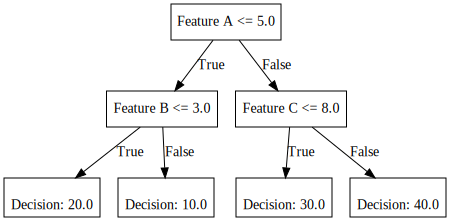

In [8]:
root.display_tree_graphviz()

K fold cross validation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
import pandas as pd


In [15]:
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)


# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
import numpy as np
# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []


# Calculate the size of each fold
fold_size = len(X) // k
# df = pd.DataFrame(data=X)

# print(df.head())
print(fold_size)

# Perform k-fold cross-validation
for i in range(k):
    # Split the data into training and test sets
    # print(i)
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]
#     print(test_labels)
    
    training_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    print(training_set)
    
    training_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    
    # Train the model
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(training_set, training_labels)
    
    # Make predictions on the validation set
    fold_predictions = dt_classifier.predict(test_set)
    
    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)
    
    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

# Print the predictions and accuracies of each fold
for i in range(k):
    print("Fold {}: Accuracy: {:.4f}".format(i+1, accuracies[i]))

200
[[ 1.13502951  0.1728874 ]
 [ 0.10508028  0.21240976]
 [ 0.87588796 -0.22494763]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]
[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]
[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]
[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]
[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.13185203 -0.62315156]
 [ 0.49018099 -0.58952675]
 [ 1.68883219  0.10284504]]
Fold 1: Accuracy: 0.8700
Fold 2: Accuracy: 0.8850
Fold 3: Accuracy: 0.9300
Fold 4: Accuracy: 0.8650
Fold 5: Accuracy: 0.8850


In [28]:
# Step 1: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.285, random_state=42)

In [29]:
hyperparameters = {}
hyperparameters['max_depth'] = [1,2,3,4,5,6,7,8,9,10]
hyperparameters['min_samples_split'] = [2,3,4,5,6,7,8]
hyperparameters['criteria_values'] = ['gini', 'entropy']

best_accuracy = 0
best_hyperparameters = {}

out = {}
count = 0
for max_depth in hyperparameters['max_depth']:
    for min_samples_split in hyperparameters['min_samples_split']:
        for criterion in hyperparameters['criteria_values']:
            # Create and fit the decision tree classifier with the current hyperparameters
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion, random_state=42)
            dt_classifier.fit(X_train, y_train)
            
            # Evaluate the performance on the validation set
            val_accuracy = dt_classifier.score(X_val, y_val)
            out[count] = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'criterion': criterion, 'val_accuracy': val_accuracy}
            count += 1

In [30]:
hparam_df = pd.DataFrame(out).T
hparam_df

,max_depth,min_samples_split,criterion,val_accuracy
0,1,2,gini,0.785
1,1,2,entropy,0.785
2,1,3,gini,0.785
3,1,3,entropy,0.785
4,1,4,gini,0.785
...,...,...,...,...
135,10,6,entropy,0.895
136,10,7,gini,0.89
137,10,7,entropy,0.895
138,10,8,gini,0.885


In [31]:
hparam_df.sort_values(by='val_accuracy', ascending=False).head(10)

,max_depth,min_samples_split,criterion,val_accuracy
76,6,5,gini,0.925
77,6,5,entropy,0.925
78,6,6,gini,0.925
79,6,6,entropy,0.925
80,6,7,gini,0.925
81,6,7,entropy,0.925
83,6,8,entropy,0.925
70,6,2,gini,0.92
82,6,8,gini,0.92
90,7,5,gini,0.915


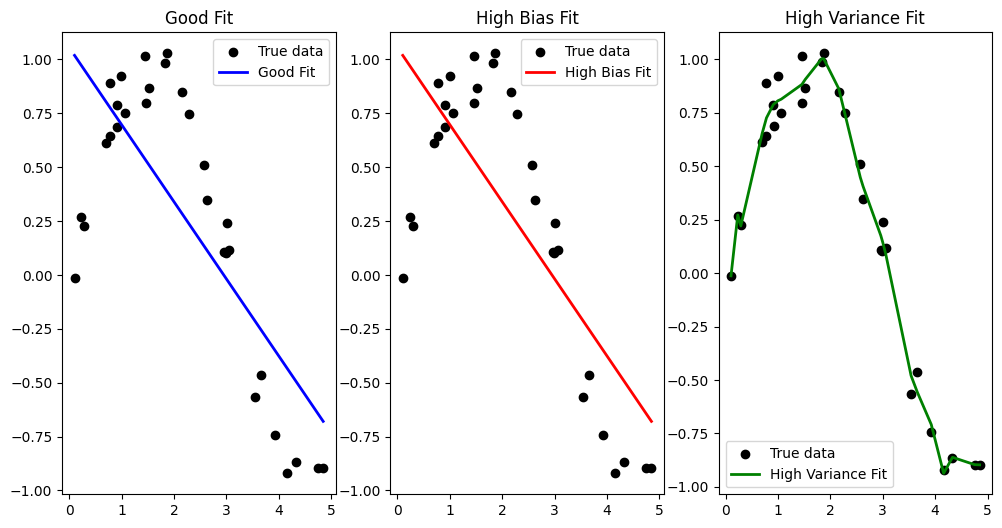

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(30, 1), axis=0)
y_true = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Model for a good fit
model_good_fit = LinearRegression()
model_good_fit.fit(X, y_true)
y_good_fit = model_good_fit.predict(X)

# Model for a high bias fit (linear)
model_high_bias = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_high_bias.fit(X, y_true)
y_high_bias = model_high_bias.predict(X)

# Model for a high variance fit (polynomial)
model_high_variance = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_high_variance.fit(X, y_true)
y_high_variance = model_high_variance.predict(X)

# Plotting
plt.figure(figsize=(12, 6))

# Good Fit
plt.subplot(1, 3, 1)
plt.scatter(X, y_true, color='black', label='True data')
plt.plot(X, y_good_fit, color='blue', linewidth=2, label='Good Fit')
plt.title('Good Fit')
plt.legend()

# High Bias
plt.subplot(1, 3, 2)
plt.scatter(X, y_true, color='black', label='True data')
plt.plot(X, y_high_bias, color='red', linewidth=2, label='High Bias Fit')
plt.title('High Bias Fit')
plt.legend()

# High Variance
plt.subplot(1, 3, 3)
plt.scatter(X, y_true, color='black', label='True data')
plt.plot(X, y_high_variance, color='green', linewidth=2, label='High Variance Fit')
plt.title('High Variance Fit')
plt.legend()

plt.show()


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Given values
precision = 0.8
recall = 0.5
total_examples = 100

# Calculating TP, FP, and FN
TP = int(precision * total_examples)
FN = int((TP / recall) - TP)
FP = int(TP / precision - TP)
TN = total_examples - (TP + FN + FP)

# Creating the confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[-80  20]
 [ 80  80]]
